importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


loading thhe dataset

In [53]:
df = pd.read_csv("/content/drive/MyDrive/machine_test/data.csv")
print(df.head())
print(df.shape)
print(df.dtypes)







     crop  moisture  temp  pump
0  cotton       638    16     1
1  cotton       522    18     1
2  cotton       741    22     1
3  cotton       798    32     1
4  cotton       690    28     1
(200, 4)
crop        object
moisture     int64
temp         int64
pump         int64
dtype: object


EDA

In [63]:
print(df.describe())
print(df.isnull().sum())




        crop     moisture        temp        pump  moisture_log_trans  \
count  200.0   200.000000  200.000000  200.000000          200.000000   
mean     0.0   633.085000   27.750000    0.750000            6.242901   
std      0.0   279.077118   10.869602    0.434099            0.839110   
min      0.0     4.000000   10.000000    0.000000            1.609438   
25%      0.0   500.500000   18.000000    0.750000            6.217566   
50%      0.0   693.500000   28.000000    1.000000            6.543179   
75%      0.0   850.750000   38.000000    1.000000            6.747292   
max      0.0  1022.000000   45.000000    1.000000            6.930495   

       temp_log_trans  
count      200.000000  
mean         3.276756  
std          0.422254  
min          2.397895  
25%          2.944439  
50%          3.367296  
75%          3.663562  
max          3.828641  
crop                  0
moisture              0
temp                  0
pump                  0
moisture_log_trans    0
temp_l

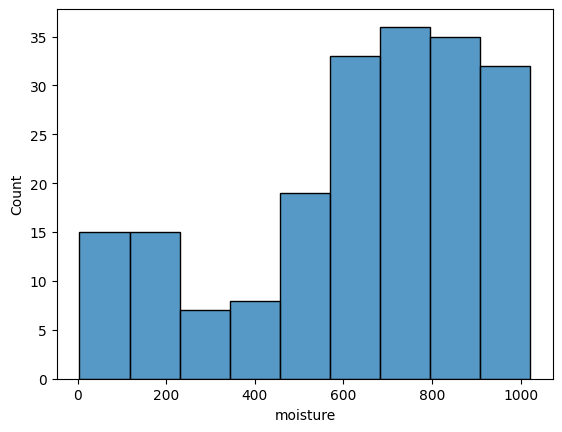

In [55]:
sns.histplot(df["moisture"])
plt.show()


encodin categorical feature

In [56]:
from sklearn.preprocessing import LabelEncoder

newlabel = LabelEncoder()
df["crop"] = newlabel.fit_transform(df["crop"])




log tansformation

In [57]:
df["moisture_log_trans"] = np.log1p(df["moisture"])
df["temp_log_trans"] = np.log1p(df["temp"])


plotting original vs log tans

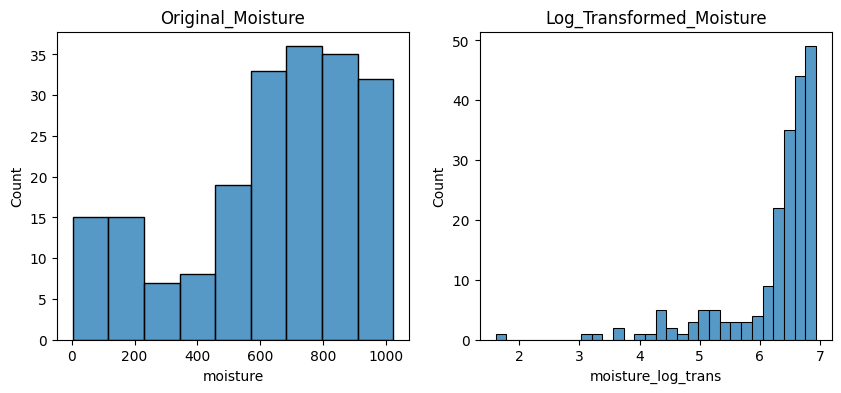

In [58]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["moisture"])
plt.title("Original_Moisture")

plt.subplot(1, 2, 2)
sns.histplot(df["moisture_log_trans"])
plt.title("Log_Transformed_Moisture")

plt.show()


tain test splitting

In [59]:
from sklearn.model_selection import train_test_split

X = df[["crop", "moisture_log_trans", "temp_log_trans"]]
y = df["pump"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


tarining teh model

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 1]


accuracy and f1 score

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



Accuracy: 0.925
F1 Score: 0.9538461538461539
